# Predicting The Weather Using Machine Learning
***
### The following is an analysis using machine learning to predict future weather patterns by training a machine learning model with past weather data from the Oakland International Airport in California. The data, along with other weather data from various areas around the world can be downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/search).

First, we will import pandas since this will be important when dealing with our data. We will also be importing the CSV file that pertains to the past weather forecasts at Oakland International Airport.

## Setting Up The Environment And Overview Of Data

In [140]:
import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col= "DATE")

In [141]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


As we can see, the weather data goes back to 1960. We can see right away there are a lot of null values, which are represented as **NaN**. We will be fixing this.

## Preparing The Data For Machine Learning

In [142]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

Above, we have different aspects of weather that are in a percentage value to make things more transparent in terms of what is going on in the bigger picture. For example, **PRCP** stands for precipitation, and **TMAX** and **TMIN** stand for max and minimum temperatures. The percentage for each category is how many null values there are. As we can see, some columns have an overwhelming amount of missing null values or data. Luckily we won't be using most of these null-heavy columns. We will focus on the most important columns since there are a lot of columns.

The five core values or columns, are:

**PRCP** = Precipitation

**SNOW** = Snowfall

**SNWD** = Snow Depth

**TMAX** = Maximum temperature

**TMIN** = Minimum temperature

Below, we will focus on these five core values and put them under **core_weather**.

In [143]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [144]:
core_weather.columns = ["precip", "snow", "snow_depth", "max_temp", "min_temp"]

In [145]:
core_weather

,precip,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


Above, we have an overview of our data with each column and the rows representing dates. We can see there are temperatures involved which are measured in Fahrenheit.

## Filling In Missing Values

In [146]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
max_temp      0.000534
min_temp      0.000593
dtype: float64

Above is the percentage of null values for our core columns.

In [147]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

Since 1960, it has snowed an inch in only one day out of 11,380. Because of this, we're going to delete the snow column since it will not be useful for our machine-learning model.

In [148]:
del core_weather["snow"]

In [149]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [150]:
del core_weather["snow_depth"]

We're also going to delete snow depth since, as we saw, it rarely snows, and snow depth is simply the amount of snow on the ground.

Now, we're going to look at the precipitation column and the rows showing a null value.

In [151]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,max_temp,min_temp
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


There's a good amount of null values in 1983, so we can specify the time period where we see these null values in 1983 to see what's going on.


In [152]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,max_temp,min_temp
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


We have only three missing values, and it's hard to know what's happening. However, we can replace these null values with 0.00 since most days, there was no rainfall by far and away in Oakland, as we will see below.

In [153]:
core_weather["precip"].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

As we can see, there were 13,664 of no rainfall, which is unanimous in our data. So we will do **fillna(0)**, which will fill these null values with 0 since that was the amount of rainfall in the vast majority of days in Oakland.

In [154]:
core_weather["precip"] = core_weather["precip"].fillna(0)

We will now look at the **max_temp** and **min_temp** columns to see what exactly is missing in terms of values. These two columns have very few values missing, luckily coming in at:

max_temp      0.000534 = 0.05%

min_temp      0.000593 = 0.06%

It's still a good idea to look at what's missing, though, even if there's a tiny percentage of missing values.

In [155]:
core_weather[pd.isnull(core_weather["max_temp"])]

,precip,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [156]:
core_weather[pd.isnull(core_weather["min_temp"])]

,precip,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


We're going to use a forward fill or **ffill**, which finds the previous value that was not null and will use that value to replace the maximum and minimum temperatures.

In [20]:
core_weather = core_weather.fillna(method="ffill")

In [21]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
max_temp    0.0
min_temp    0.0
dtype: float64

As we can see, we now have zero null values, which means **ffill** worked. So our three main values left have no null values since the other two columns, snow and snow depth, didn't have any use to our dataset. Now we can move on to ensuring we have the correct data types.

## Verifying We Have The Correct Data Types

In [22]:
core_weather.dtypes

precip      float64
max_temp    float64
min_temp    float64
dtype: object

An important aspect is making sure our data types are all numerical, and as we see above, all three are, which is indicated by **float64**.

In [23]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

We have dates here, as we can see in our index, and they're being treated as strings since we see they are objects. What we want to do is turn this index into a daytime index. This will be important because we're dealing with dates, allowing us to manipulate our data.

In [164]:
core_weather.index = pd.to_datetime(core_weather.index)

In [165]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

As we can see, the change has occurred, and the change from a normal index to a daytime index will be evident soon in our analysis. For example, if we want to look at a specific year or month, we can do the following.

In [166]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16859)

In [167]:
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='DATE', length=16859)

## Analyzing The Weather Data

<AxesSubplot:xlabel='DATE'>

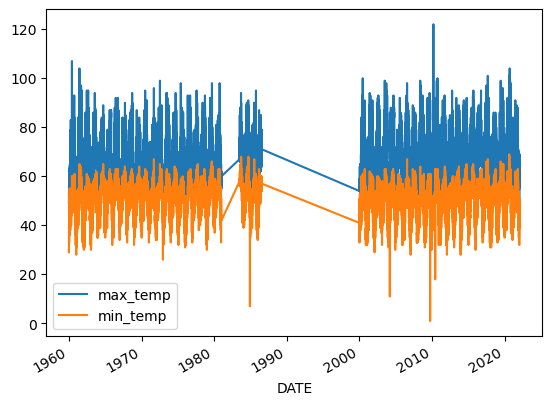

In [29]:
core_weather[["max_temp", "min_temp"]].plot()

Now that we are starting to graph our data, we see something is off. Between roughly 1980 and 1983 or so, there is missing data. We also have missing data from roughly 1985-2000. What we can do is print out each year and see exactly what years are missing data or have incomplete data.

In [30]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

What we can see is years are missing. We're missing 1981 and 1982, along with 1987-1999. We also can see some missing data from years such as 1983 and 1986. Since we're using historical data for our machine-learning model, we already have a lot of data to go off. It's not a big deal that some years are missing or incomplete. We could go back and fill in these gaps with other weather stations nearby Oakland, but this could also be a rabbit hole since there might not be weather stations or areas nearby or too far from Oakland to be able to use.

<AxesSubplot:xlabel='DATE'>

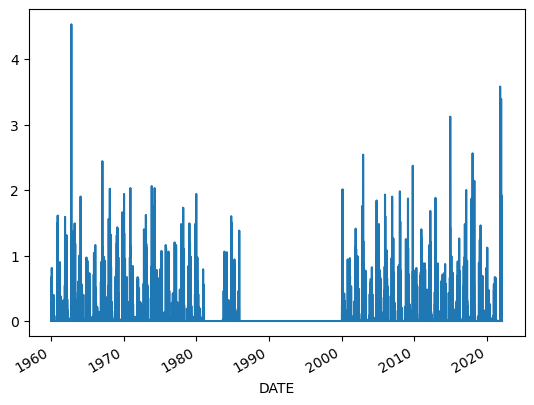

In [31]:
core_weather["precip"].plot()

Here is a chart for the precipitation; we can see a few outliers. The chart shows the year on the x-axis and the number of inches it rained each year on the y-axis. The outliers, though, can be seen, such as in roughly 1963, it rained way more than in other years.

Next, we can look at how much precipitation there was in inches for each year in total.

In [39]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

Above, we can see the total precipitation in inches of rain for each year from 1960-2022. The year with the most rain was 1973, at 29.37 inches of rain, and the year with the least rain was 2013, at 4.89. I'm not counting 1986 because, as you can see, it does say there were 0 inches of rain. Still, if we remember, the data from that year isn't complete and is registering instead as there having been no rain that year which is impossible, all things considered.

In [47]:
maxValues = core_weather.groupby(core_weather.index.year).max()
print(maxValues)

      precip  max_temp  min_temp
DATE                            
1960    1.61     107.0      61.0
1961    1.59     104.0      65.0
1962    4.53      95.0      61.0
1963    1.49      94.0      62.0
1964    1.90      89.0      65.0
1965    1.04      87.0      63.0
1966    1.16      92.0      63.0
1967    2.44      90.0      64.0
1968    2.02      94.0      63.0
1969    1.66      87.0      64.0
1970    2.03      95.0      63.0
1971    0.84      96.0      67.0
1972    1.40      99.0      65.0
1973    2.06      94.0      63.0
1974    2.03      94.0      64.0
1975    1.16      98.0      60.0
1976    1.20      93.0      63.0
1977    1.48      95.0      65.0
1978    1.73      93.0      63.0
1979    1.94      98.0      66.0
1980    0.97      98.0      63.0
1983    1.06      94.0      68.0
1984    1.60      91.0      68.0
1985    1.38      95.0      67.0
1986    0.00      87.0      63.0
2000    2.01     100.0      63.0
2001    1.41      94.0      62.0
2002    2.54      93.0      60.0
2003    0.

Above are the maximum values in terms of temperature for each year. There are some outliers, as we saw earlier, and the one that stands out for the highest temperature is in 2010. It says it hit 122 as a high, but this is incorrect, as the hottest temperature in Oakland for 2010 was 100 degrees Fahrenheit. Also, the year 1960 is incorrect where it says it hit 107. Beyond that, every other year is correct except 2022, as the data is incomplete since the full year has yet to happen. The two years with the hottest temperature were 1961 and 2020, when it hit 104 degrees Fahrenheit.

In [48]:
minValues = core_weather.groupby(core_weather.index.year).min()
print(minValues)

      precip  max_temp  min_temp
DATE                            
1960     0.0      46.0      29.0
1961     0.0      46.0      28.0
1962     0.0      40.0      30.0
1963     0.0      43.0      30.0
1964     0.0      48.0      36.0
1965     0.0      45.0      32.0
1966     0.0      49.0      34.0
1967     0.0      46.0      36.0
1968     0.0      43.0      32.0
1969     0.0      46.0      35.0
1970     0.0      45.0      35.0
1971     0.0      47.0      33.0
1972     0.0      38.0      26.0
1973     0.0      45.0      32.0
1974     0.0      45.0      33.0
1975     0.0      49.0      32.0
1976     0.0      41.0      31.0
1977     0.0      50.0      35.0
1978     0.0      47.0      30.0
1979     0.0      48.0      34.0
1980     0.0      49.0      33.0
1983     0.0      49.0      41.0
1984     0.0      46.0       7.0
1985     0.0      47.0      34.0
1986     0.0      53.0      39.0
2000     0.0      51.0      32.0
2001     0.0      49.0      32.0
2002     0.0      47.0      29.0
2003     0

Above are the minimum values in temperature for each year. The lowest temperature ever recorded from 1894-2022 in Oakland was 25 degrees Fahrenheit, so everything below that is incorrect. We can see this in 1984, 2004, 2009, and 2010. The real lowest temperature from our dataset is in 1972 when it hit 26 degrees Fahrenheit. Again, some of the data is a bit off in some years, but more is needed to outright get rid of the data. Things will still be pretty accurate for our machine-learning model.

In [49]:
core_weather["target"] = core_weather.shift(-1)["max_temp"]

Here we're using **shift(-1)** to pull every row back one position with **max_temp**. This is because we're ensuring we're predicting tomorrow's temperature with today's and the previous day's data.

In [50]:
core_weather

,precip,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


The target column above is what the temperature was, and this ensures we're predicting temperatures for days correctly.

In [51]:
core_weather = core_weather.iloc[:-1,:].copy()

You can see above that the last date on 2022-01-28 has a missing value for the target column, so we're going to get rid of that row which we did with the code above this cell.

In [52]:
core_weather

,precip,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


Now we can see the last row with the missing value is gone.

Now we will use Ridge regression from importing sklearn to help train our model.

In [53]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [54]:
predictors = ["precip", "max_temp", "min_temp"]

Here we're putting our three main values under predictors.

In [55]:
training_set = core_weather.loc[:"2020-12-31"]

In [56]:
test = core_weather.loc["2021-01-01":]

Our training set shown as **training_set** is everything from 2020-12-31 and before, and our test data is the year of 2021 and the first part of 2022.

In [60]:
reg.fit(training_set[predictors], training_set["target"])

Ridge(alpha=0.1)

Here, we're using the fit method to help with our training set using the predictor's columns.

In [61]:
predictions = reg.predict(test[predictors])

In [63]:
from sklearn.metrics import mean_absolute_error

Using **mean_absolute_error**, we subtract the actual from the predictions, take the absolute value, and then find the average across all predictions.

In [64]:
mean_absolute_error(test["target"], predictions)

3.4111699434528306

## Evaluating Our Model

As we can see, on average, we were about 3.41 degrees off the actual temperature, which isn't too bad for our first prediction.

In [168]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "prediction"]

In [169]:
combined

,actual,prediction
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


Above, we've combined the actual and predictions we did to get a better visual idea of how off we were with our predictions. The **actual** column is the actual temperature on the given day, and the **prediction** column is what the model predicted the temperature would be.

<AxesSubplot:xlabel='DATE'>

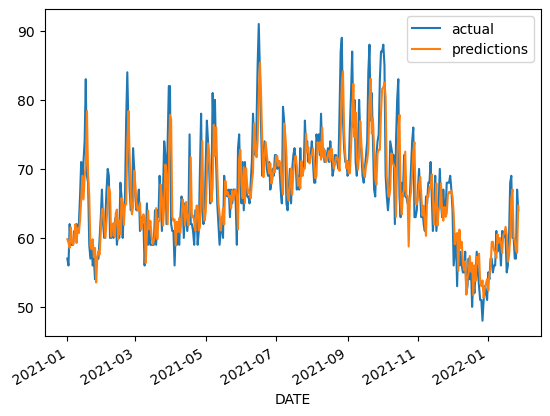

In [71]:
combined.plot()

Here is a better idea looking at the model's prediction for the temperature and what the actual temperature was. As we've discussed, there are some outliers where the actual temperature is slightly above or below the predicted temperature.

## Creating A Function To Make Predictions

In [102]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

Above, we've created a function that allows us to run our code instead of copying and pasting our code individually line by line every time we want to create predictions with different models.

## Adding Rolling Means

In [73]:
core_weather["month_max"] = core_weather["max_temp"].rolling(30).mean()

The rolling mean looks each day for the past month and finds the average for the column in that period.

In [74]:
core_weather

,precip,max_temp,min_temp,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


As we can see, we have **NaN** values present. The reason is that the dataset we're using starts on 1960-01-01, so there's no month before that to use the rolling mean. What we can see, though, in the later rows is the mean of the previous 30 days.

In [75]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["max_temp"]

In [110]:
core_weather["max_min"] = core_weather["max_temp"] / core_weather["min_temp"]

In [111]:
predictors = ["precip", "max_temp", "min_temp", "month_max", "month_day_max", "max_min"]

What we've done above is added three additional predictors, which are **month_max**, **month_day_max**, and **max_min**, which will help make our model more accurate so we can check the error value to see if it's gotten better.

In [112]:
core_weather = core_weather.iloc[30:,:].copy()

Now we will get rid of the first 30 rows since there's no data, which can be done with **iloc[30:,:]**.

In [113]:
error, combined = create_predictions(predictors, core_weather, reg)

In [114]:
error

3.3599324001395185

Now our error margin has slightly lowered which is nice, but we can definitely improve upon this. Below is a graph similar to the one above showing the difference in our margin of error being slightly lowered. 

<AxesSubplot:xlabel='DATE'>

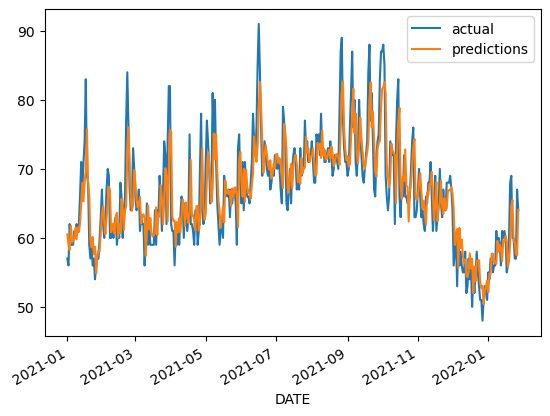

In [115]:
combined.plot()

## Adding Monthly And Daily Averages

In [116]:
core_weather["monthly_avg"] = core_weather["max_temp"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

Here we're using pandas expanding function, which only takes previous rows and calculates the mean. This is so that we're not taking weather data from the future. For example, our data goes from 1960-2022, but let's say we wanted to know the monthly average in 1980. If we want to know the monthly average for that year, we don't want to also mix in data from after 1980 since those years have yet to happen. So, in that case, it would only apply data from 1980 and before for a more accurate result.

In [117]:
core_weather

,precip,max_temp,min_temp,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-05-30,0.0,76.0,51.0,77.0,67.533333,0.888596,1.490196,76.000000
1960-05-31,0.0,77.0,52.0,90.0,67.900000,0.881818,1.480769,76.500000
1960-06-01,0.0,90.0,57.0,107.0,68.933333,0.765926,1.578947,90.000000
1960-06-02,0.0,107.0,60.0,84.0,70.533333,0.659190,1.783333,98.500000
1960-06-03,0.0,84.0,56.0,74.0,71.166667,0.847222,1.500000,93.666667
...,...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.779972
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.782241
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.782394


Above, we can see our new predictor's columns have been added. We also see the monthly average on the far right, which is the average of all numbers up to that point in that month. For example, the first date is May 30th of 1960. The monthly average is all numbers up to that day in the month. Then we have in the third row June 1st of 1960. Since it's the first day of the month and the max temperature, as we see, was 90, the monthly average is shown to be 90 since that's the only day the model can take into account for the average in that month.

In [118]:
core_weather["day_of_year_avg"] = core_weather["max_temp"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [121]:
predictors = ["precip", "max_temp", "min_temp", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [122]:
error, combined = create_predictions(predictors, core_weather, reg)

In [171]:
error

3.317740373884236

Now with our new predictors, we can see that the margin of error has lowered from 3.36 to 3.317! This means that on average, we're within roughly 3.32 degrees of the actual temperature. We could get this lower, but it would be a lot more work to keep trying to get the model closer and closer to the actual temperature. This is obviously fine, but it gets to the point where we're doing more work for less payoff as we keep trying to improve the model. For this analysis, I'm going to stop trying to get the error margin lower since we've lowered it already from its original margin of error, and I'm happy with where things are right now.

## Conclusion

In conclusion, we've created a machine learning model that predicts, within roughly 3.32 degrees, the actual temperature for an upcoming day. There's a lot that goes into this type of analysis, and we could keep trying to improve upon what we've done since we saw there are days with missing values that we could fill in, but we already have so many days overall that those null values don't ruin the prediction much at all. The same thing happened with the days with null values for no precipitation; we just filled in those null values with zero inches of rain since, by far and away, most days near the Oakland airport had zero inches of rain. We could try to get data from an airport or city nearby from the dataset list on the NOAA website, but again those cities might not have complete data and it won't change the margin of error that much. 